In [76]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Aqui va las cosas de integrar

def funcion_trapezoid(f, a, b, m):

    valores_x = np.linspace(a, b, m+1)
    valores_f = f(valores_x)
    
    cociente = (b-a) / (m)

    sumatorio = 0 

    for indice in range(len(valores_f)-1):
        sumatorio += valores_f[indice] + valores_f[indice+1]

    return cociente / 2 * sumatorio

def funcion_simpson(f, a, b, m):
    valores_x = np.linspace(a, b, m+1)
    valores_f = f(valores_x)
    
    cociente = (b-a) / (m)

    sumatorio_pares = 0 
    sumatorio_impares = 0 

    for indice in range(1, len(valores_f)-1):

        if indice % 2 == 0:
            sumatorio_pares += valores_f[indice] 

    for indice in range(0, len(valores_f)-1):

        if indice % 2 != 0:
            sumatorio_impares += valores_f[indice] 

    return cociente / 3 * (valores_f[0] + 2*sumatorio_pares + 4*sumatorio_impares + valores_f[len(valores_f)-1])



In [4]:
# Aquí compruebas con los ejemplos de la teoria que estan bien programados
a = -1
b = 1
m = 10
f = lambda x: np.exp(-x**2)

print(funcion_trapezoid(f, a, b, m))
print(funcion_simpson(f, a, b, m))

1.4887366795273342
1.493674109820692


In [74]:
# Aquí va newton

def funcion_newton(f, f_prima, x0, error):
    
    indice = 0
    sol = [x0]
    
    while True:
        # print('Newton: ', sol[indice], '\t', f(sol[indice]), '\t', f_prima(sol[indice]))

        if f_prima(sol[indice]) == 0:
            sol.append(sol[indice] + 1)
        else:
            sol.append(sol[indice] - f(sol[indice]) / f_prima(sol[indice]))
        
        if abs( sol[indice + 1] - sol[indice] ) < error:
            return sol[indice]
        
        indice += 1



In [46]:
# Aquí compruebas con los ejemplos de la teoria que estan bien programados

f = lambda x: x**2 - 1
f_derivada = lambda x: 2*x

funcion_newton(f, f_derivada, 3, 0.0001)

1.0000305180437934

In [91]:
# Aqui van los euler 

def funcion_euler_explicito(f_prima, f0, x0, x, h):
    
    t_ = np.arange(x0, x0+x, h)
    N = len(t_)

    u = np.zeros_like(t_)
    u[0] = f0
 
    for i in range(N-1):
        u[i+1] = u[i] + h * f_prima(u[i], t_[i])
    
    return u

def funcion_euler_implicito(f_prima, f_prima_prima, f0, x0, x, h, error_newton):
    
    t_ = np.arange(x0, x0+x, h)
    N = len(t_)

    u = np.zeros_like(t_)
    u[0] = f0
        
    for i in range(N-1):        
        
        def g(y):
            return u[i] - u[i+1] + h*f_prima(y, t_[i+1])
        
        def g_prima(y): 
            return -1 + h*f_prima_prima(y, t_[i+1])
        
        u[i+1] = funcion_newton(g, g_prima, u[i], error_newton)

    return u

In [ ]:
# Testeo de los metodos euler

## Ejercicio 1


In [56]:
# Definimos la derivada del algoritmo de Newton
def f_derivada(x):
    return 1 / np.sqrt(2*np.pi) * np.exp(-x**2 / 2)

error = 1e-5 # El criterio de parada del algoritmo (es la diferencia máxima entre las dos ultimas iteraciones del algoritmo)
p0 = 0.5 # La que creemos que es la raiz. Se usa como punto de partdia del algoritmo
x0 = p0
constante_de_integracion = -0.45

intervalos_composite = 100000 # La cantidad de intervalos de los metodos trapezoid y simpson

# Definimos una funcion que nos devuelva la integral por trapezoid de 0 a x
def f_por_trapezoid(x):
    return funcion_trapezoid(f_derivada, 0, x, intervalos_composite) + constante_de_integracion 

# Definimos una funcion que nos devuelva la integral por simpson de 0 a x
def f_por_simpson(x):
    return funcion_simpson(f_derivada, 0, x, intervalos_composite) + constante_de_integracion 


resultado_newton_con_trapezoid = funcion_newton(f_por_trapezoid, f_derivada, x0, error)
resultado_newton_con_simpson = funcion_newton(f_por_simpson, f_derivada, x0, error)

print(resultado_newton_con_trapezoid)
print(resultado_newton_con_simpson)


1.6448536257046285
1.644853625667597


## Ejercicio 2

In [92]:
# Definimos la derivada la integral, que es la funcion de la ODE
def f_prima(y, t):
    return np.sqrt(1 + t**3)

# Definimos la segunda derivada la integral, que es la derivada de que se va a usar como derivada en el algoritmo de newton
def f_prima_prima(y, t):
    return 1/2 * 3*t**2 * (1 + t**3)**(-1/2) 

f0 = 0
x0 = 0
x = 5

h = 1/64

error_newton = 1e-4

resultados_por_explicito = {} # Esto es un diccionario que va a almacenar con una clave h (1/64, 1/32, 1/16 ...) y con valor una lista con los resultados del algoritmo con esa h 
resultados_por_implicito = {} # Lo mismo por aqui pero con los resultados del implicito

while h <= 1:
    resultados_por_explicito[h] = funcion_euler_explicito(f_prima, f0, x0, x, h)
    # resultados_por_implicito[h] = funcion_euler_implicito(f_prima, f_prima_prima, f0, x0, x, h, error_newton)
    h *= 2

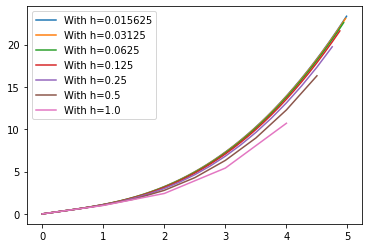

In [96]:
# Ploteamos las soluciones de explicito

for hi, resultado in resultados_por_explicito.items():
    plt.plot( np.arange(x0, x0+x, hi), resultado, label=f'With h={hi}')

plt.legend()
plt.show()

In [ ]:
# Ploteamos las soluciones de implicito

for hi, resultado in resultados_por_implicito.items():
    plt.plot( np.arange(x0, x0+x, hi), resultado, label=f'With h={hi}')

plt.legend()
plt.show()